For each mouse
1. (Manual) Find summary excel file, extract names of green and yellow sessions
2. VidsDCIMG = Find video files, one for each trial
3. refImg = Find reference image
4. trialTypes = Find trial types
5. t1.mat, t2.mat = Find warping files 
6. allenBrain = Find allen brain map

Processing:
1. Testing_A:
    * For each mouse, load ::: refImg, t1.mat, allenBrain
      * Gallero\SDT-TDT\overlay\mou_9
        - L_modified (brain areas for all mice) ::: Gallero\SDT-TDT\overlay\mou_9/L_modified.mat
        - RefImg ::: Gallero\SDT-TDT\overlay\mou_9\refImg_ROIs.mat
    * For each session, load ::: t2.mat
      - Gallero/mou_9/TDT/20180315/widefield_labview/ROI_Allen/registration_transform_1510.mat
    * Apply transform to refImg, overplot allenBrain, check that they align
2. Testing_B:
    * Load all trial videos
        - Gallero\mou_9\TDT\20180301\widefield_labview
    * Compute time-average images
    * Apply same as Testing_A
    * Plot a few random sessions
3. Process real data - for each session:
    * Provide list of sessions to analyze
    * Provide root folder to mouse data
    * Provide root folder to overlay data
    * Videos
        * Load all trial videos
        * Apply transformation
        * Apply allen map to extract activities, average over pixels
        * Store in HDF5
    * Trial Intervals:
        * Load trial interval file
          - Gallero\mou_9\TDT\20180301\widefield_labview\a\Matt_files\20180301a.mat
        * Store 3rd column to HDF5
    * Trial Types:
        * Load trial type file
          - \Gallero\mou_9\TDT\20180301\widefield_labview\a\Matt_files/trials_ind.mat
        * Parse, store to HDF5
4. Postprocess datatypes
    * Read HDF5
    * Merge trials for each session
    * Calc times from intervals
    * Apply polyfit, look
    * Perform DFF, store


Notes:

* Matlab Fitting routines
   - t1= align to mapping day (functional); aligns every day to a common day.
   - t2= aligns the common day to Allen institue

`
tform = fitgeotrans(movingPoints,fixedPoints,'polynomial',3);
Jregistered = imwarp(refImg*7000,tform,'OutputView',imref2d(size(A_scaled))); %aligned map
`

**TODO**:
* Compare TrialTypes to to trial_idx.m where applicable, otherwise trial_error.m
* Compare resulting bn_trial with what Yasir got

In [18]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "pub-2020-exploratory-analysis"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
sys.path.append(rootpath)
print("Appended root directory", rootpath)

from mesostat.utils.qt_helper import gui_fpath

from lib.gallegosalas.preprocess_raw import preprocess


%load_ext autoreload
%autoreload 2

Appended root directory /home/alyosha/work/git/pub-2020-exploratory-analysis


In [19]:
FPS = 20  # Hz
mice = ['mou_9', 'mou_6', 'mou_7', 'mou_5']
extra_mice = ['mou_15_Ariel', 'mou_18_Ariel']

In [20]:
# pathTGT = gui_fpath('root path to TGT')
pathTGT = '/run/user/1000/gvfs/smb-share:server=130.60.51.15,share=neurophysiology-storage2/Gallero'

In [21]:
# pathOverlay = gui_fpath('root path to overlay')
pathOverlay = '/run/user/1000/gvfs/smb-share:server=130.60.51.15,share=neurophysiology-storage2/Gallero/SDT-TDT/overlay'

In [22]:
# pathPreferences = gui_fpath('root path to overlay')
pathPreferences = '/media/alyosha/Data/TE_data/yasirdata_raw'
# pathPreferences = '/media/aleksejs/DataHDD/work/data/yasir/yasirdata_raw'

In [23]:
pathDict = {
    'TGT' : pathTGT,
    'Overlay' : pathOverlay,
    'Preferences' : pathPreferences
}

In [24]:
prep = preprocess(pathDict)

# 1. Test transform on Ref files

/opt/anaconda3/envs/py3qt5/lib/python3.8/site-packages/pymatreader/utils.py:213: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


mou_5


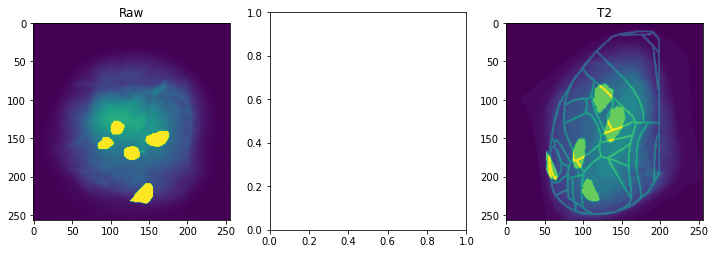

mou_6


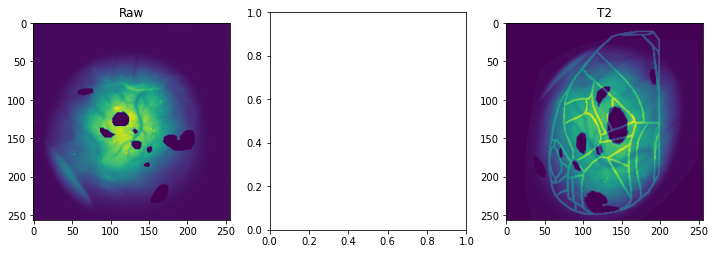

mou_7


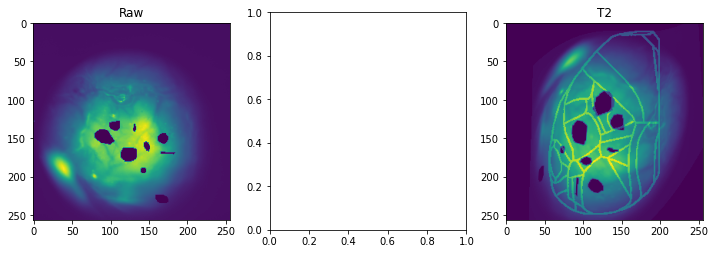

mou_9


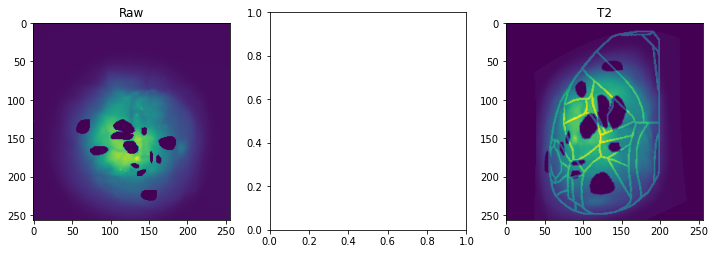

In [15]:
for mouseName, pathRef in prep.pathRef.items():
    img = prep.load_ref_img(pathRef)
    t2 = prep.load_t2(prep.pathT2[mouseName])
    print(mouseName)
    
    imgT2 = prep.transform_img(img, t2)[0]
    prep.plot_transforms(img, imgT2, imgT1=None)

# 2. Test transform on Video Files

mou_5
-- 2017_03_17
-- 2017_03_29
-- 2017_03_23
-- 2017_03_13
-- 2017_03_16
-- 2017_03_28
-- 2017_03_22
-- 2017_03_15
-- 2017_03_06
-- 2017_03_24
-- 2017_03_14


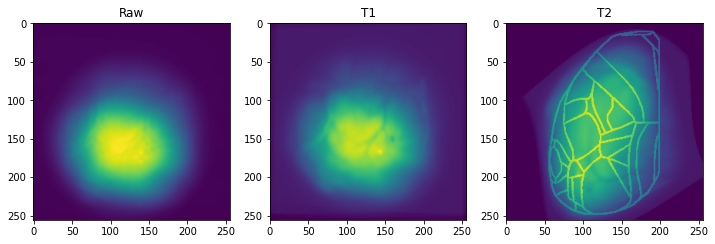

mou_6
-- 20171011
-- 20171006
-- 20170929
-- 20170926
-- 20171002
-- 20170927
-- 20171010
-- 20171012
-- 20170925
-- 20171009
-- 20171005
-- 20171004
-- 20170928


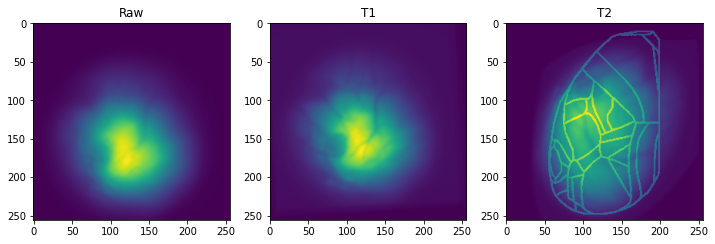

mou_7
-- 20171114
-- 20171129
-- 20171115
-- 20171113
-- 20171128
-- 20171122
-- 20171123
-- 20171127
-- 20171130
-- 20171116


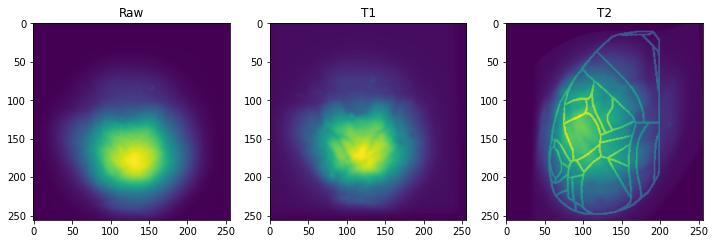

mou_9
-- 20180307
-- 20180309
-- 20180313
-- 20180302
-- 20180301
-- 20180308
-- 20180305
-- 20180315
-- 20180316
-- 20180306


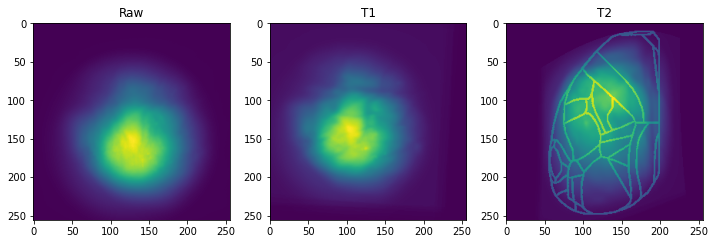

CPU times: user 9.17 s, sys: 6.19 s, total: 15.4 s
Wall time: 2min 21s


In [28]:
%%time
for mousename in sorted(set(prep.dataPaths['mouse'])):
    print(mousename)
    prep.test_transform_vids(mousename)

# 3. Pool-process video files

In [ ]:
prep.process_video_files('mou_5', skipExisting=False)

<KeysViewHDF5 []>
processing 2017_03_06_session01
- 0 / 254
- 1 / 254
- 2 / 254
- 3 / 254
- 4 / 254
- 5 / 254
- 6 / 254
- 7 / 254
- 8 / 254
- 9 / 254
- 10 / 254
- 11 / 254
- 12 / 254
- 13 / 254
- 14 / 254
- 15 / 254
- 16 / 254
- 17 / 254
- 18 / 254
- 19 / 254
- 20 / 254
- 21 / 254
- 22 / 254
- 23 / 254
- 24 / 254
- 25 / 254
- 26 / 254
- 27 / 254
- 28 / 254
- 29 / 254
- 30 / 254
- 31 / 254
- 32 / 254
- 33 / 254
- 34 / 254
- 35 / 254
- 36 / 254
- 37 / 254
- 38 / 254
- 39 / 254
- 40 / 254
- 41 / 254
- 42 / 254
- 43 / 254
- 44 / 254
- 45 / 254
- 46 / 254
- 47 / 254
- 48 / 254
- 49 / 254
- 50 / 254
- 51 / 254
- 52 / 254
- 53 / 254
- 54 / 254
- 55 / 254
- 56 / 254
- 57 / 254
- 58 / 254
- 59 / 254
- 60 / 254
- 61 / 254
- 62 / 254
- 63 / 254
- 64 / 254
- 65 / 254
- 66 / 254
- 67 / 254
- 68 / 254
- 69 / 254
- 70 / 254
- 71 / 254
- 72 / 254
- 73 / 254
- 74 / 254
- 75 / 254
- 76 / 254
- 77 / 254
- 78 / 254
- 79 / 254
- 80 / 254
- 81 / 254
- 82 / 254
- 83 / 254
- 84 / 254
- 85 / 254
- 86 / 254
- 8

# 4. Pull trial types

* Also compute d'

In [26]:
import pymatreader
from mesostat.utils.matlab_helper import loadmat

In [17]:
for path in prep.dataPaths['trialIndPath']:
    print(loadmat(path).keys())

dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200'])
dict_keys(['tr_100', 'tr_1200', 'tr_FA', 'tr_MISS', 'tr_early'])
dict_keys(['tr_100', 'tr_1200', 'tr_FA', 'tr_MISS', 'tr_early'])
dict_keys(['tr_100', 'tr_1200', 'tr_FA', 'tr_MISS', 'tr_early'])
dict_keys(['tr_100', 'tr_1200', 'tr_FA', 'tr_MISS', 'tr_early'])
dict_keys(['tr_100', 'tr_1200', 'tr_FA', 'tr_MI

# 5. Pull trial times

# 6. Baseline subtraction

# 6.1 Plot stitched session, fit poly

# 6.2 Process all sessions